In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, kendalltau

# Función para calcular las correlaciones de Spearman y Kendall
def calculate_correlations(original_data, imputed_data):
    spearman_corr, _ = spearmanr(original_data, imputed_data)
    kendall_corr, _ = kendalltau(original_data, imputed_data)
    return spearman_corr, kendall_corr

# Ruta al directorio base donde se encuentran las carpetas de cada técnica
base_directory = r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Precipitación\Vacios Continuos"

# Carga de los datos originales
original_data_path = r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Precipitación\PP.csv"
original_data = pd.read_csv(original_data_path)
original_data['Fecha'] = pd.to_datetime({'year': original_data['Anio'], 'month': original_data['Mes'], 'day': original_data['Dia']})

# Filtrar solo los datos para la ID_CIDERH "M_030_A_XV"
original_data = original_data[original_data['ID_CIDERH'] == 'M_030_A_XV']

# Fecha donde se realizó la imputación 2000/1/1 hasta el 2000/1/15
dates_of_missing_values = pd.date_range(start='2000-01-02', periods=14)

# Preparar un DataFrame para guardar los resultados
correlation_results = []

# Diccionario para los nombres de las carpetas
technique_folders = {
    'Hot_Deck': 'Resultados_Imputacion_Hot_Deck',
    'IDW': 'Resultados_Imputacion_IDW',
    'KNN': 'Resultados_Imputacion_KNN',
    'Razon_Normal': 'Resultados_Imputacion_Razon_Normal',
    'WKNNI': 'Resultados_Imputacion_WKNNI',
    'ID': 'Resultados_Imputados_ID'
}

# Iterar sobre las carpetas de técnicas de imputación
for technique, folder_name in technique_folders.items():
    technique_path = os.path.join(base_directory, folder_name)
    
    # Iterar sobre los archivos CSV de imputación dentro de cada técnica
    for i in range(1, 16):
        file_name = f'PP_imputado_{technique}_{i + 1}.csv'
        file_path = os.path.join(technique_path, file_name)
        
        # Verificar si el archivo existe
        if os.path.isfile(file_path):
            # Carga de los datos imputados
            imputed_data = pd.read_csv(file_path)
            imputed_data['Fecha'] = pd.to_datetime({'year': imputed_data['Anio'], 'month': imputed_data['Mes'], 'day': imputed_data['Dia']})
            
            # Filtrar los datos imputados solo para la ID_CIDERH "M_030_A_XV"
            imputed_data = imputed_data[imputed_data['ID_CIDERH'] == 'M_030_A_XV']

            # Filtrar tanto los datos originales como los imputados para las fechas con valores nulos
            mask_original = original_data['Fecha'].isin(dates_of_missing_values)
            mask_imputed = imputed_data['Fecha'].isin(dates_of_missing_values)
            filtered_original = original_data[mask_original]
            filtered_imputed = imputed_data[mask_imputed]
            
            # Asegurarse de que los datos estén en el mismo orden
            filtered_imputed.sort_values(by='Fecha', inplace=True)
            filtered_original.sort_values(by='Fecha', inplace=True)

            # Calcular las correlaciones
            spearman_corr, kendall_corr = calculate_correlations(filtered_original['PP_RBE'], filtered_imputed['PP_RBE'])

            # Agregar los resultados a la lista
            correlation_results.append({
                'Technique': technique,
                'File': file_name,
                'Spearman': spearman_corr,
                'Kendall': kendall_corr
            })

# Convertir la lista de resultados en un DataFrame
correlation_results_df = pd.DataFrame(correlation_results)

# Guardar los resultados en un archivo CSV
correlation_results_df.to_csv(r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Precipitación\Vacios Continuos\correlations_results.csv", index=False)

# Imprimir los resultados
print(correlation_results_df)

C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_imputed.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_original.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_imputed.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_original.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_imputed.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_original.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_imputed.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_original.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_imputed.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_original.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_imputed.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_original.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

   Technique                        File  Spearman   Kendall
0   Hot_Deck  PP_imputado_Hot_Deck_2.csv  1.000000  1.000000
1   Hot_Deck  PP_imputado_Hot_Deck_3.csv  0.751190  0.778015
2   Hot_Deck  PP_imputado_Hot_Deck_4.csv  0.746155  0.764324
3   Hot_Deck  PP_imputado_Hot_Deck_5.csv  0.702282  0.687546
4   Hot_Deck  PP_imputado_Hot_Deck_6.csv  0.465130  0.488962
..       ...                         ...       ...       ...
79        ID       PP_imputado_ID_11.csv  0.385253  0.318441
80        ID       PP_imputado_ID_12.csv  0.376242  0.294853
81        ID       PP_imputado_ID_13.csv  0.362724  0.271265
82        ID       PP_imputado_ID_14.csv  0.277112  0.200500
83        ID       PP_imputado_ID_15.csv  0.277112  0.200500

[84 rows x 4 columns]


C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_imputed.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_original.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_19280\579797567.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [2]:
import pandas as pd

# Asegúrate de tener la ruta correcta al archivo CSV
df = pd.read_csv("correlations_results.csv")

# Calcular estadísticas descriptivas para Spearman y Kendall por técnica
descriptive_stats_spearman = df.groupby('Technique')['Spearman'].describe()
descriptive_stats_kendall = df.groupby('Technique')['Kendall'].describe()

# Calcular el IQR para Spearman y Kendall
descriptive_stats_spearman['IQR'] = descriptive_stats_spearman['75%'] - descriptive_stats_spearman['25%']
descriptive_stats_kendall['IQR'] = descriptive_stats_kendall['75%'] - descriptive_stats_kendall['25%']

# Medidas adicionales de Kurtosis y Skewness
descriptive_stats_spearman['Kurtosis'] = df.groupby('Technique')['Spearman'].apply(pd.Series.kurtosis)
descriptive_stats_spearman['Skewness'] = df.groupby('Technique')['Spearman'].skew()
descriptive_stats_kendall['Kurtosis'] = df.groupby('Technique')['Kendall'].apply(pd.Series.kurtosis)
descriptive_stats_kendall['Skewness'] = df.groupby('Technique')['Kendall'].skew()

print(descriptive_stats_spearman)
print(descriptive_stats_kendall)

              count      mean       std       min       25%       50%  \
Technique                                                               
Hot_Deck       14.0  0.512591  0.207255  0.295136  0.394265  0.421519   
ID             14.0  0.510192  0.213630  0.277112  0.378495  0.429418   
IDW            14.0  0.637613  0.243248  0.216283  0.482693  0.711586   
KNN            14.0  0.469130  0.240207  0.202765  0.309780  0.384356   
Razon_Normal   14.0  0.332399  0.407664 -0.322171 -0.005069  0.456842   
WKNNI          14.0  0.478863  0.250168  0.202765  0.304147  0.391119   

                   75%       max       IQR  Kurtosis  Skewness  
Technique                                                       
Hot_Deck      0.654707  1.000000  0.260442  0.768624  1.202399  
ID            0.671141  1.000000  0.292647  0.477887  1.095953  
IDW           0.826569  0.953811  0.343876 -1.015577 -0.468156  
KNN           0.663366  0.995381  0.353586  0.022197  0.960279  
Razon_Normal  0.686009  0

<Figure size 800x400 with 0 Axes>

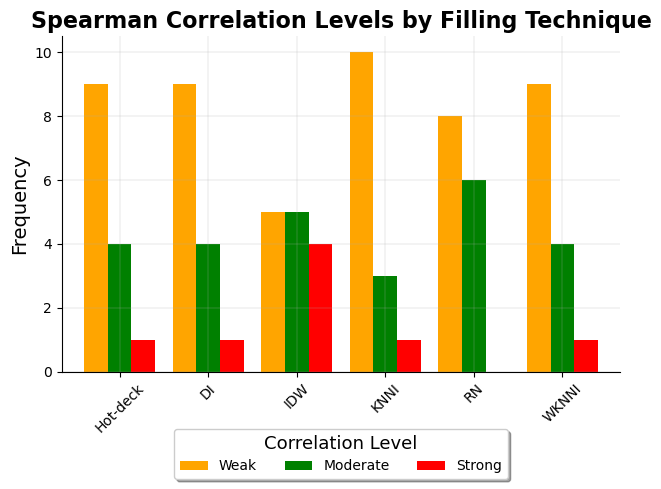

In [3]:
import matplotlib.pyplot as plt

df = pd.read_csv("correlations_results.csv")

# Correlaciones de spearman
#correlation_results_df['Spearman_Cat'] = pd.cut(correlation_results_df['Spearman'], bins=[0, 0.3, 0.6, 1], labels=['Weak', 'Moderate', 'Strong'])

correlation_results_df['Spearman_Cat'] = pd.cut(correlation_results_df['Spearman'], bins=[-np.inf, 0.5, 0.8, np.inf], labels=['Weak', 'Moderate', 'Strong'])

spearman_cat_counts = correlation_results_df.groupby(['Technique', 'Spearman_Cat']).size().unstack().fillna(0)

technique_names = {'Hot_Deck': 'Hot-deck', 'IDW': 'IDW', 'KNN': 'KNNI', 'ID': 'DI', 'Razon_Normal': 'RN', 'WKNNI': 'WKNNI'}
spearman_cat_counts.rename(index=technique_names, inplace=True)

# Plot
plt.figure(figsize=(8, 4))
spearman_cat_counts.plot(kind='bar', stacked=False, color=['orange', 'green', 'red'], width=0.8)
plt.title('Spearman Correlation Levels by Filling Technique', fontsize=16, fontweight='bold')
plt.xlabel('Filling Techniques', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45) 

plt.tight_layout()  
plt.grid(linestyle='-', linewidth=0.2)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(title='Correlation Level', fontsize=10, title_fontsize='13', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)

plt.show()

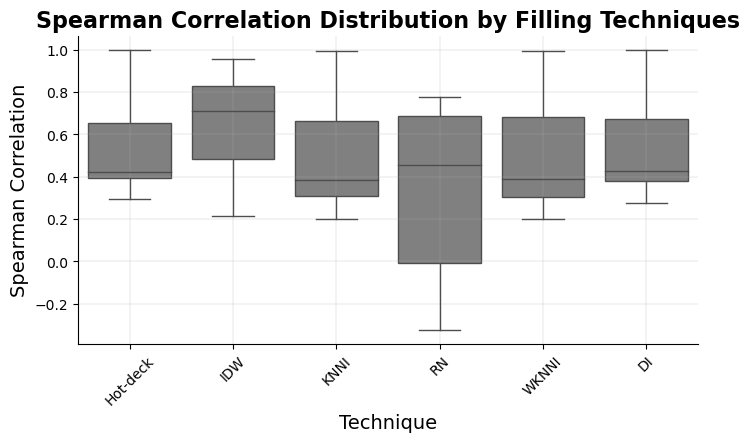

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("correlations_results.csv")

plt.figure(figsize=(8, 4))
boxplot = sns.boxplot(x='Technique', y='Spearman', data=df, color='gray', linewidth=1)


technique_names = ['Hot-deck', 'IDW', 'KNNI', 'RN', 'WKNNI', 'DI']


boxplot.set_xticklabels(technique_names)

plt.title('Spearman Correlation Distribution by Filling Techniques', fontsize=16, fontweight='bold')
plt.xlabel('Technique', fontsize=14)
plt.ylabel('Spearman Correlation', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.grid(linestyle='-', linewidth=0.2)
sns.despine()
plt.show()
plt.show()

<Figure size 800x400 with 0 Axes>

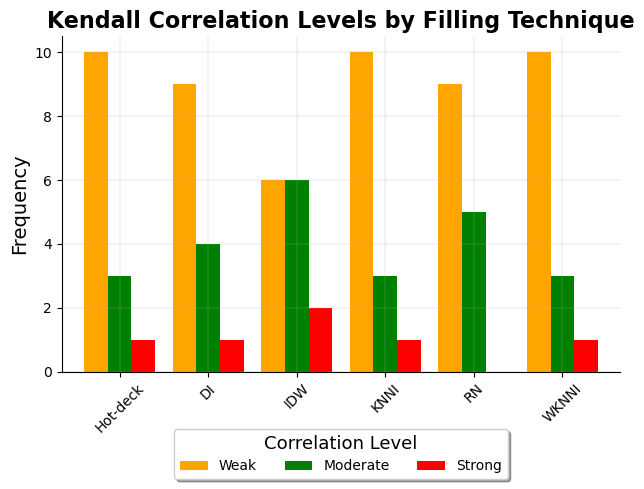

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

correlation_results_df = pd.read_csv("correlations_results.csv")

# Kendall correlation categorization
correlation_results_df['Kendall_Cat'] = pd.cut(correlation_results_df['Kendall'], bins=[-np.inf, 0.5, 0.8, np.inf], labels=['Weak', 'Moderate', 'Strong'])

kendall_cat_counts = correlation_results_df.groupby(['Technique', 'Kendall_Cat']).size().unstack().fillna(0)

technique_names = {'Hot_Deck': 'Hot-deck', 'IDW': 'IDW', 'KNN': 'KNNI', 'ID': 'DI', 'Razon_Normal': 'RN', 'WKNNI': 'WKNNI'}
kendall_cat_counts.rename(index=technique_names, inplace=True)

# Plot
plt.figure(figsize=(8, 4))
kendall_cat_counts.plot(kind='bar', stacked=False, color=['orange', 'green', 'red'], width=0.8)
plt.title('Kendall Correlation Levels by Filling Technique', fontsize=16, fontweight='bold')
plt.xlabel('Filling Techniques', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.grid(linestyle='-', linewidth=0.2)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(title='Correlation Level', fontsize=10, title_fontsize='13', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)

# Display plot
plt.show()

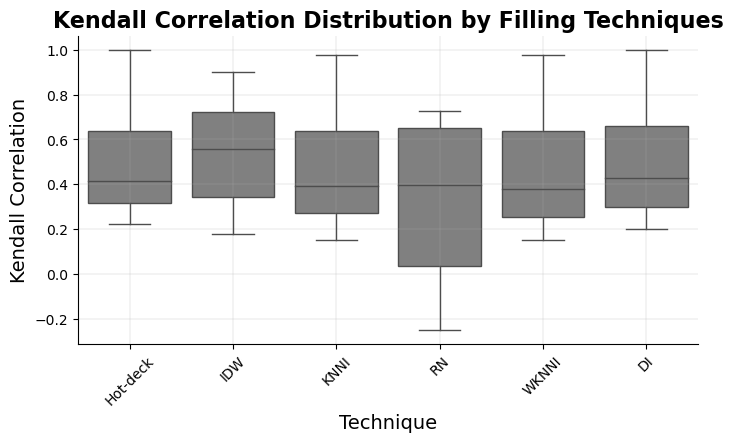

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("correlations_results.csv")

plt.figure(figsize=(8, 4))
boxplot = sns.boxplot(x='Technique', y='Kendall', data=df, color='gray', linewidth=1)

technique_names = ['Hot-deck', 'IDW', 'KNNI', 'RN', 'WKNNI', 'DI']

boxplot.set_xticklabels(technique_names)

plt.title('Kendall Correlation Distribution by Filling Techniques', fontsize=16, fontweight='bold')
plt.xlabel('Technique', fontsize=14)
plt.ylabel('Kendall Correlation', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.grid(linestyle='-', linewidth=0.2)
sns.despine()
plt.show()

In [1]:
import os
import pandas as pd

# Función para calcular los errores residuales
def calculate_residual_errors(original_data, imputed_data):
    return (original_data - imputed_data).abs()

# Ruta al directorio base y carga de los datos originales
base_directory = r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Precipitación\Vacios Continuos"
original_data_path = r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Precipitación\PP.csv"
original_data = pd.read_csv(original_data_path)
original_data['Fecha'] = pd.to_datetime({'year': original_data['Anio'], 'month': original_data['Mes'], 'day': original_data['Dia']})

# Filtrar solo los datos para la ID_CIDERH "M_030_A_XV"
original_data = original_data[original_data['ID_CIDERH'] == 'M_030_A_XV']

# Fecha donde se realizó la imputación 2000/2/1 hasta el 2000/1/15
dates_of_missing_values = pd.date_range(start='2000-01-02', periods=14)

# Preparar un DataFrame para guardar los errores residuales
residuals_results = []

# Diccionario para los nombres de las carpetas
technique_folders = {
    'Hot_Deck': 'Resultados_Imputacion_Hot_Deck',
    'IDW': 'Resultados_Imputacion_IDW',
    'KNN': 'Resultados_Imputacion_KNN',
    'Razon_Normal': 'Resultados_Imputacion_Razon_Normal',
    'WKNNI': 'Resultados_Imputacion_WKNNI',
    'ID': 'Resultados_Imputados_ID'
}

# Iterar sobre las carpetas de técnicas de imputación
for technique, folder_name in technique_folders.items():
    technique_path = os.path.join(base_directory, folder_name)
    
    # Iterar sobre los archivos CSV de imputación dentro de cada técnica
    for i in range(1, 16):
        file_name = f'PP_imputado_{technique}_{i + 1}.csv'
        file_path = os.path.join(technique_path, file_name)
        
        # Verificar si el archivo existe
        if os.path.isfile(file_path):
            # Carga de los datos imputados
            imputed_data = pd.read_csv(file_path)
            imputed_data['Fecha'] = pd.to_datetime({'year': imputed_data['Anio'], 'month': imputed_data['Mes'], 'day': imputed_data['Dia']})
            
            # Filtrar tanto los datos originales como los imputados para las fechas con valores nulos
            imputed_data = imputed_data[imputed_data['ID_CIDERH'] == 'M_030_A_XV']
            mask_original = original_data['Fecha'].isin(dates_of_missing_values)
            mask_imputed = imputed_data['Fecha'].isin(dates_of_missing_values)
            filtered_original = original_data[mask_original]
            filtered_imputed = imputed_data[mask_imputed]
            
            # Asegurarse de que los datos estén en el mismo orden
            filtered_imputed.sort_values(by='Fecha', inplace=True)
            filtered_original.sort_values(by='Fecha', inplace=True)
            
            # Calcular los errores residuales
            residual_errors = calculate_residual_errors(filtered_original['PP_RBE'], filtered_imputed['PP_RBE'])
            
            # Agregar los resultados a la lista
            residuals_results.append({
                'Technique': technique,
                'File': file_name,
                'Residual_Error': residual_errors.mean()  # Calculamos la media del error residual
            })

# Convertir la lista de errores residuales en un DataFrame
residuals_df = pd.DataFrame(residuals_results)

# Guardar los errores residuales en un archivo CSV
residuals_df.to_csv(r"C:\Users\hctrl\OneDrive\Tesis\Experimento\Precipitación\Vacios Continuos\residuals_results.csv", index=False)

# Calcular estadísticas descriptivas para los errores residuales
descriptive_stats_residuals = residuals_df['Residual_Error'].describe()

# Agregar medidas de curtosis y asimetría
descriptive_stats_residuals['Curtosis'] = residuals_df['Residual_Error'].kurtosis()
descriptive_stats_residuals['Asimetría'] = residuals_df['Residual_Error'].skew()

C:\Users\hctrl\AppData\Local\Temp\ipykernel_14672\2437152861.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_imputed.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_14672\2437152861.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_original.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_14672\2437152861.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

C:\Users\hctrl\AppData\Local\Temp\ipykernel_2216\2437152861.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_imputed.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_2216\2437152861.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_original.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_2216\2437152861.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

C:\Users\hctrl\AppData\Local\Temp\ipykernel_2216\2437152861.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_imputed.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_2216\2437152861.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_original.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_2216\2437152861.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

C:\Users\hctrl\AppData\Local\Temp\ipykernel_2216\2437152861.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_imputed.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_2216\2437152861.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_original.sort_values(by='Fecha', inplace=True)
C:\Users\hctrl\AppData\Local\Temp\ipykernel_2216\2437152861.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [2]:
#leer archivo csv
archivo_csv = "residuals_results.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

   Technique                        File  Residual_Error
0   Hot_Deck  PP_imputado_Hot_Deck_2.csv        0.030937
1   Hot_Deck  PP_imputado_Hot_Deck_3.csv        0.861603
2   Hot_Deck  PP_imputado_Hot_Deck_4.csv        0.939409
3   Hot_Deck  PP_imputado_Hot_Deck_5.csv        1.177216
4   Hot_Deck  PP_imputado_Hot_Deck_6.csv        1.989357
..       ...                         ...             ...
79        ID       PP_imputado_ID_11.csv        3.752276
80        ID       PP_imputado_ID_12.csv        3.929553
81        ID       PP_imputado_ID_13.csv        4.294962
82        ID       PP_imputado_ID_14.csv        4.679888
83        ID       PP_imputado_ID_15.csv        4.698131

[84 rows x 3 columns]


In [3]:
import pandas as pd

residuals_df = pd.read_csv('residuals_results.csv')

# Calcular estadísticas descriptivas para los errores residuales por cada técnica
grouped_residuals = residuals_df.groupby('Technique')['Residual_Error']
descriptive_stats_by_technique = grouped_residuals.describe()

# Calcular kurtosis y asimetría por cada técnica
descriptive_stats_by_technique['Curtosis'] = grouped_residuals.apply(pd.Series.kurt)
descriptive_stats_by_technique['Asimetría'] = grouped_residuals.apply(pd.Series.skew)

# Reorganizar las columnas para que coincidan con la estructura de la tabla de la imagen
descriptive_stats_by_technique = descriptive_stats_by_technique[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'Curtosis', 'Asimetría']]

# Calcular el IQR 
descriptive_stats_by_technique['IQR'] = descriptive_stats_by_technique['75%'] - descriptive_stats_by_technique['25%']

# Renombrar las columnas al Español para que coincidan con la imagen
descriptive_stats_by_technique.columns = ['Media', 'Desv. Estándar', 'Mínimo', 'Q1', 'Mediana', 'Q3', 'Máximo', 'Curtosis', 'Coef. Asimetría', 'IQR']

# Imprimir las estadísticas descriptivas por técnica
print(descriptive_stats_by_technique)

                 Media  Desv. Estándar    Mínimo        Q1   Mediana  \
Technique                                                              
Hot_Deck      2.789723        1.534337  0.030937  1.380251  3.081667   
ID            2.661430        1.583723  0.031975  1.165968  2.899304   
IDW           1.994249        1.155666  0.347076  0.907470  2.201850   
KNN           2.840338        1.691512  0.078233  1.198574  3.140181   
Razon_Normal  3.006684        1.816041  0.684645  1.399398  2.558777   
WKNNI         2.788501        1.633413  0.078233  1.207550  3.146239   

                    Q3    Máximo  Curtosis  Coef. Asimetría       IQR  
Technique                                                              
Hot_Deck      3.970077  4.614053 -1.151319        -0.493731  2.589826  
ID            3.885234  4.698131 -1.335185        -0.289097  2.719266  
IDW           3.043466  3.476455 -1.786437        -0.098357  2.135995  
KNN           4.169803  4.925294 -1.415093        -0.331699  2.

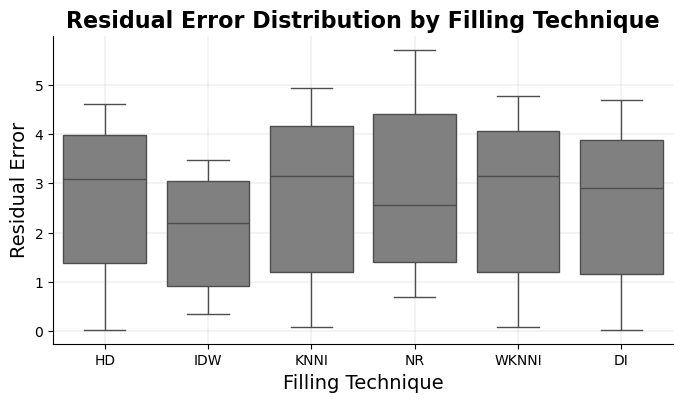

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reemplazo de los nombres de las técnicas
new_names = {
    'Hot_Deck': 'HD',
    'IDW': 'IDW',
    'KNN': 'KNNI',
    'ID': 'DI',
    'Razon_Normal': 'NR',
    'WKNNI': 'WKNNI'
}

# Asegúrate de que tu DataFrame se llama 'residuals_df'
residuals_df['Technique'] = residuals_df['Technique'].replace(new_names)

plt.figure(figsize=(8, 4))
sns.boxplot(x='Technique', y='Residual_Error', data=residuals_df, color='gray', linewidth=1)
plt.grid(linestyle='-', linewidth=0.2)
plt.title('Residual Error Distribution by Filling Technique', fontsize=16, fontweight='bold')
plt.xlabel('Filling Technique', fontsize=14)
plt.ylabel('Residual Error', fontsize=14)
sns.despine()

# Guarda la imagen en formato .eps
plt.savefig('residuals_plot.eps', format='eps', bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


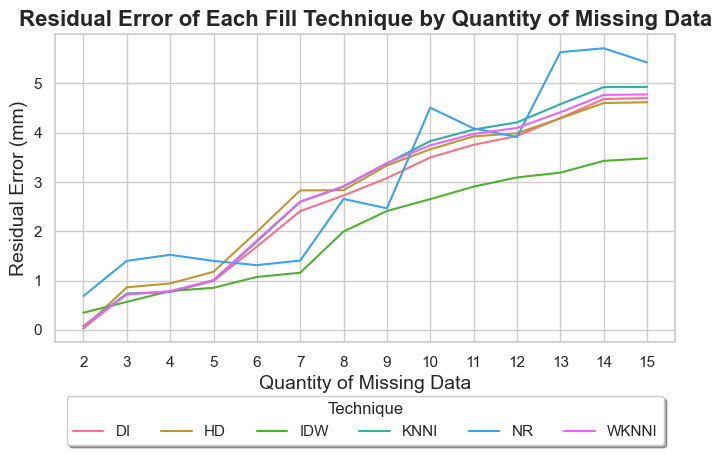

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

residuals_df = pd.read_csv('residuals_results.csv')

# Reemplazo de los nombres de las técnicas
new_names = {
    'Hot_Deck': 'HD',
    'IDW': 'IDW',
    'KNN': 'KNNI',
    'ID': 'DI',
    'Razon_Normal': 'NR',
    'WKNNI': 'WKNNI'
}

residuals_df['Technique'] = residuals_df['Technique'].replace(new_names)

residuals_df['Iteration'] = residuals_df['File'].str.extract(r'_(\d+)\.csv').astype(int)

pivot_df = residuals_df.pivot(index='Iteration', columns='Technique', values='Residual_Error')

# Define el estilo del gráfico
sns.set(style="whitegrid")

# Crea el gráfico de líneas con líneas continuas
plt.figure(figsize=(8, 4))

palette = sns.color_palette("husl", len(pivot_df.columns))

sns.lineplot(data=pivot_df, palette=palette, dashes=False)

# Añade título y etiquetas a los ejes
plt.title('Residual Error of Each Fill Technique by Quantity of Missing Data', fontsize=16, fontweight='bold')
plt.xlabel('Quantity of Missing Data', fontsize=14)
plt.ylabel('Residual Error (mm)', fontsize=14)

# Añade leyenda fuera del gráfico
plt.legend(title='Technique', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(pivot_df.columns))

plt.xticks(ticks=pivot_df.index, labels=pivot_df.index)

# Guarda la imagen en formato .eps
plt.savefig('residuals_plot.eps', format='eps', bbox_inches='tight')

# Muestra el gráfico
plt.show()